In [1]:
# D209 Code

In [2]:
# Imports

# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

C:\Users\bower\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Import csv dataset

medical_data = pd.read_csv(r"C:\Users\bower\OneDrive\Desktop\WGU\D208\3kfid8emf9rkc9ek30sf (2)\medical_clean.csv")

In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
# Send to new Data Frame with variables I am using

medical_df = pd.DataFrame(medical_data[['Diabetes','TotalCharge','Initial_days','Services','Initial_admin','Income']])

In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diabetes       10000 non-null  object 
 1   TotalCharge    10000 non-null  float64
 2   Initial_days   10000 non-null  float64
 3   Services       10000 non-null  object 
 4   Initial_admin  10000 non-null  object 
 5   Income         10000 non-null  float64
dtypes: float64(3), object(3)
memory usage: 468.9+ KB


In [7]:
# Check for Outliers/Null Values in Numeric Data

medical_df.isnull().sum()

Diabetes         0
TotalCharge      0
Initial_days     0
Services         0
Initial_admin    0
Income           0
dtype: int64

In [8]:
medical_df.describe()

,TotalCharge,Initial_days,Income
count,10000.000000,10000.000000,10000.000000
mean,5312.172769,34.455299,40490.495160
std,2180.393838,26.309341,28521.153293
min,1938.312067,1.001981,154.080000
25%,3179.374015,7.896215,19598.775000
50%,5213.952000,35.836244,33768.420000
75%,7459.699750,61.161020,54296.402500
max,9180.728000,71.981490,207249.100000


<Axes: xlabel='TotalCharge'>

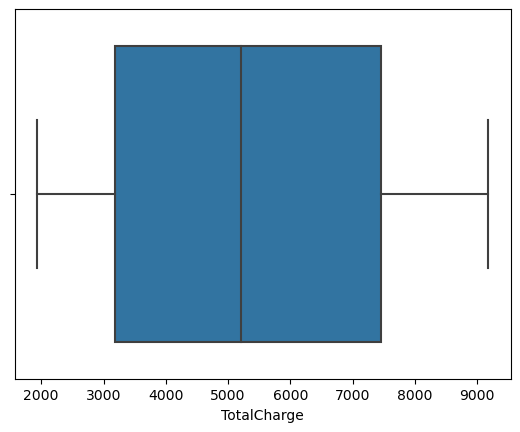

In [9]:
# TotalCharge Outlier Check

sns.boxplot(x = 'TotalCharge', data = medical_df)

<Axes: xlabel='Initial_days'>

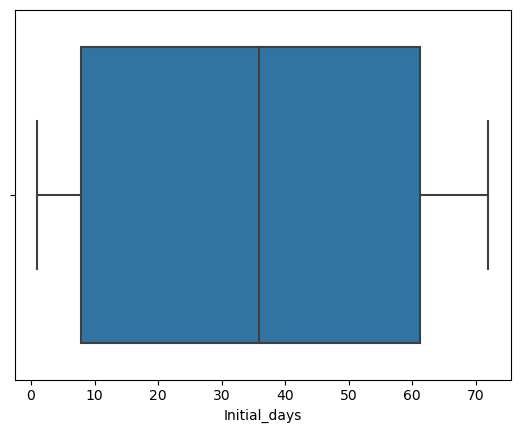

In [10]:
# Initial_days Outlier Check

sns.boxplot(x = 'Initial_days', data = medical_df)

<Axes: xlabel='Income'>

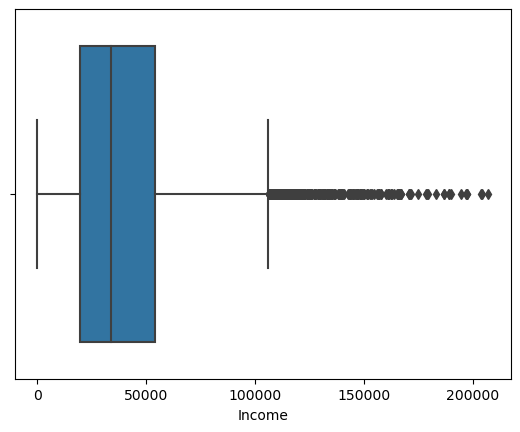

In [11]:
# Income Outlier Check

sns.boxplot(x = 'Income', data = medical_df)

In [12]:
medical_df['Income'] = np.where(medical_df['Income'] > 75000, np.nan, medical_df['Income'])
medical_df.describe()

,TotalCharge,Initial_days,Income
count,10000.000000,10000.000000,8840.000000
mean,5312.172769,34.455299,32746.642408
std,2180.393838,26.309341,18181.453384
min,1938.312067,1.001981,154.080000
25%,3179.374015,7.896215,18136.665000
50%,5213.952000,35.836244,30043.980000
75%,7459.699750,61.161020,46004.397500
max,9180.728000,71.981490,74947.020000


In [13]:
# Impute missing values for Income
medical_df.Income.isnull().sum()

1160

In [14]:
medical_df['Income'].fillna(medical_df['Income'].median(), inplace = True)

In [15]:
medical_df.Income.isnull().sum()

0

<Axes: xlabel='Income'>

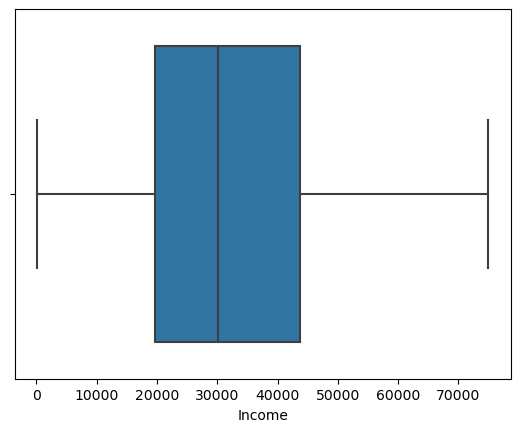

In [16]:
sns.boxplot(x = 'Income', data = medical_df)

In [17]:
# Exploratory Data Analysis

In [18]:
# Statistics for Each Variable

In [19]:
# TotalCharge

medical_df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [20]:
# Initial_days

medical_df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [21]:
# Income

medical_df.Income.describe()

count    10000.000000
mean     32433.133569
std      17116.218602
min        154.080000
25%      19598.775000
50%      30043.980000
75%      43681.377500
max      74947.020000
Name: Income, dtype: float64

In [22]:
# Services

print(medical_df.Services.describe())
print(medical_df.Services.value_counts())

count          10000
unique             4
top       Blood Work
freq            5265
Name: Services, dtype: object
Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64


In [23]:
# Initial_admin

print(medical_df.Initial_admin.describe())
print(medical_df.Initial_admin.value_counts())

count                   10000
unique                      3
top       Emergency Admission
freq                     5060
Name: Initial_admin, dtype: object
Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64


In [24]:
# Diabetes

print(medical_df.Diabetes.describe())
print(medical_df.Diabetes.value_counts())

count     10000
unique        2
top          No
freq       7262
Name: Diabetes, dtype: object
Diabetes
No     7262
Yes    2738
Name: count, dtype: int64


In [25]:
# Univariate Visualizations

(array([ 817., 2325., 1381.,  420.,  145.,  423., 1049., 1614., 1522.,
         304.]),
 array([1938.312067 , 2662.5536603, 3386.7952536, 4111.0368469,
        4835.2784402, 5559.5200335, 6283.7616268, 7008.0032201,
        7732.2448134, 8456.4864067, 9180.728    ]),
 <BarContainer object of 10 artists>)

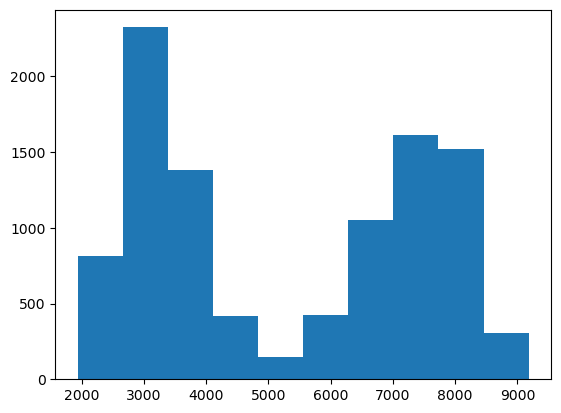

In [26]:
# Totalcharge

plt.hist(medical_df.TotalCharge)

(array([2563., 1586.,  669.,  157.,   34.,  271.,  546., 1033., 1451.,
        1690.]),
 array([ 1.00198092,  8.09993183, 15.19788274, 22.29583364, 29.39378455,
        36.49173546, 43.58968637, 50.68763728, 57.78558818, 64.88353909,
        71.98149   ]),
 <BarContainer object of 10 artists>)

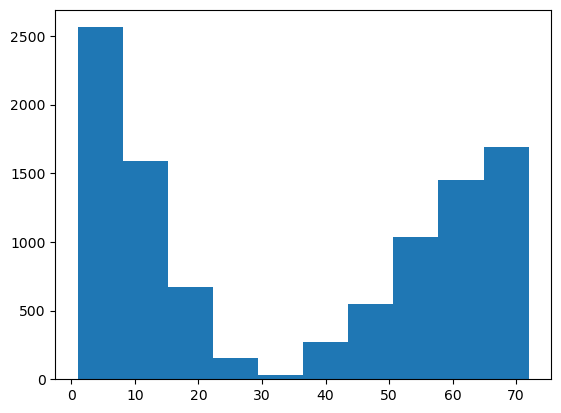

In [27]:
# Initial_days

plt.hist(medical_df.Initial_days)

(array([ 516., 1179., 1338., 2550., 1108.,  990.,  811.,  640.,  502.,
         366.]),
 array([  154.08 ,  7633.374, 15112.668, 22591.962, 30071.256, 37550.55 ,
        45029.844, 52509.138, 59988.432, 67467.726, 74947.02 ]),
 <BarContainer object of 10 artists>)

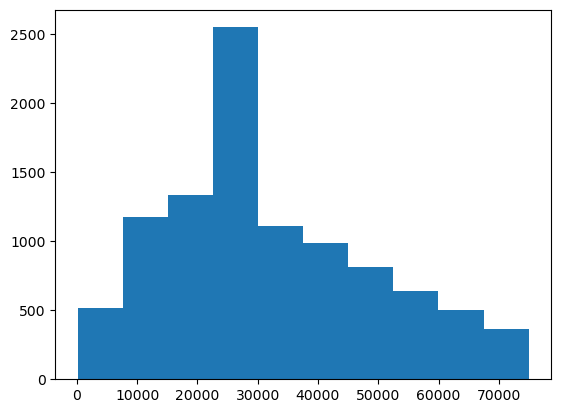

In [28]:
# Income

plt.hist(medical_df.Income)

<Axes: title={'center': 'Diabetes Univariate'}, xlabel='Diabetes', ylabel='Instances'>

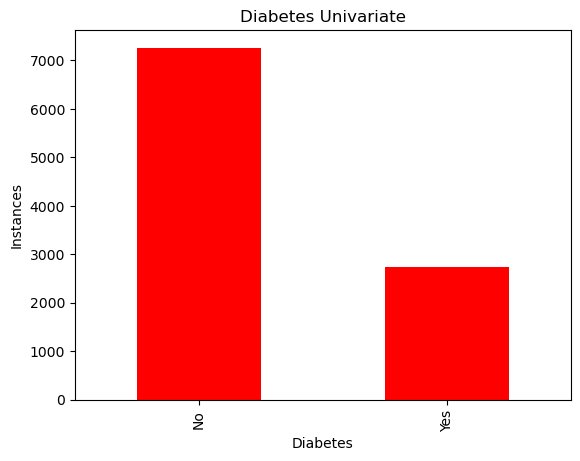

In [29]:
# Diabetes

medical_df['Diabetes'].value_counts().plot(kind='bar', color="Red", xlabel='Diabetes', ylabel="Instances", title="Diabetes Univariate")

<Axes: title={'center': 'Services Univariate'}, xlabel='Services', ylabel='Instances'>

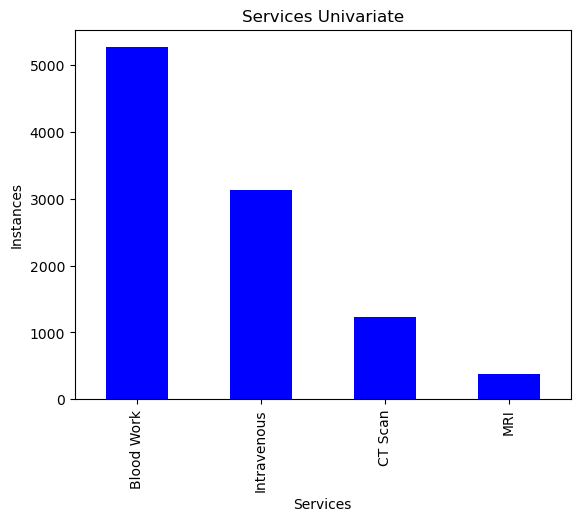

In [30]:
# Services

medical_df['Services'].value_counts().plot(kind='bar', color="Blue", xlabel='Services', ylabel="Instances", title="Services Univariate")

<Axes: title={'center': 'Initial Admission Univariate'}, xlabel='Initial Admission', ylabel='Instances'>

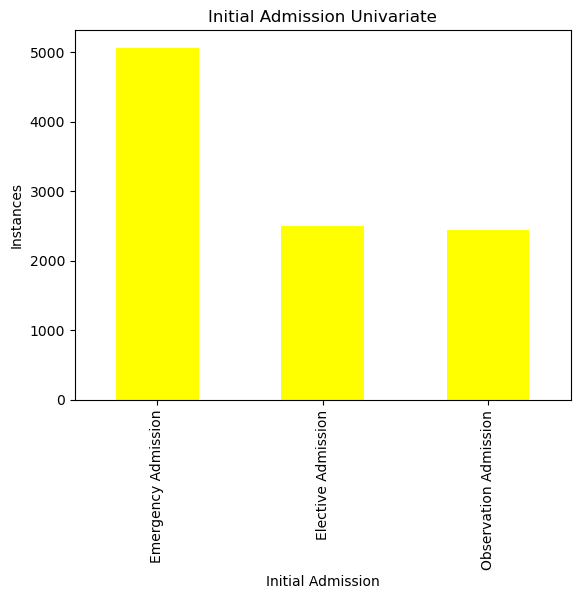

In [31]:
# Initial_admin

medical_df['Initial_admin'].value_counts().plot(kind='bar', color="Yellow", xlabel='Initial Admission', ylabel="Instances", title="Initial Admission Univariate")

In [32]:
# Bivariate visualizations

<Axes: xlabel='TotalCharge', ylabel='Initial_days'>

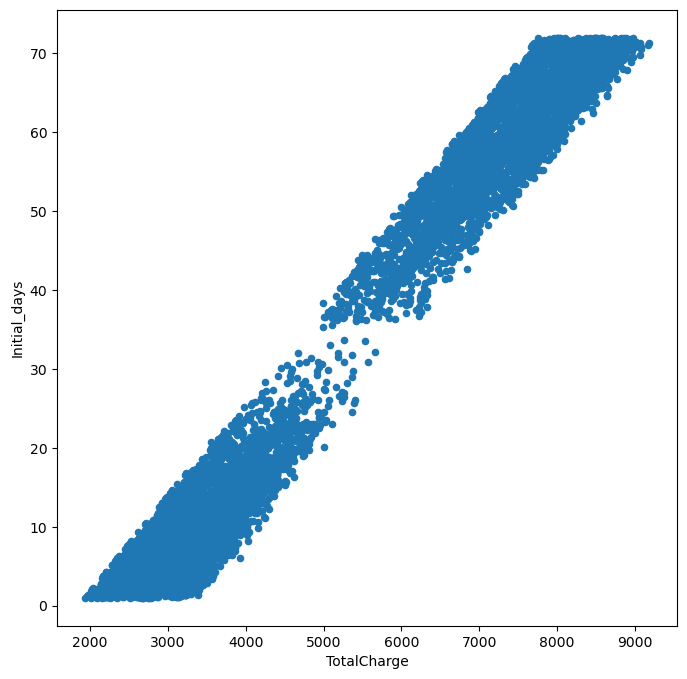

In [33]:
# TotalCharge vs. Initial_days

medical_df.plot.scatter(x='TotalCharge', y='Initial_days', marker = "o", figsize=(8,8))

<Axes: xlabel='TotalCharge', ylabel='Income'>

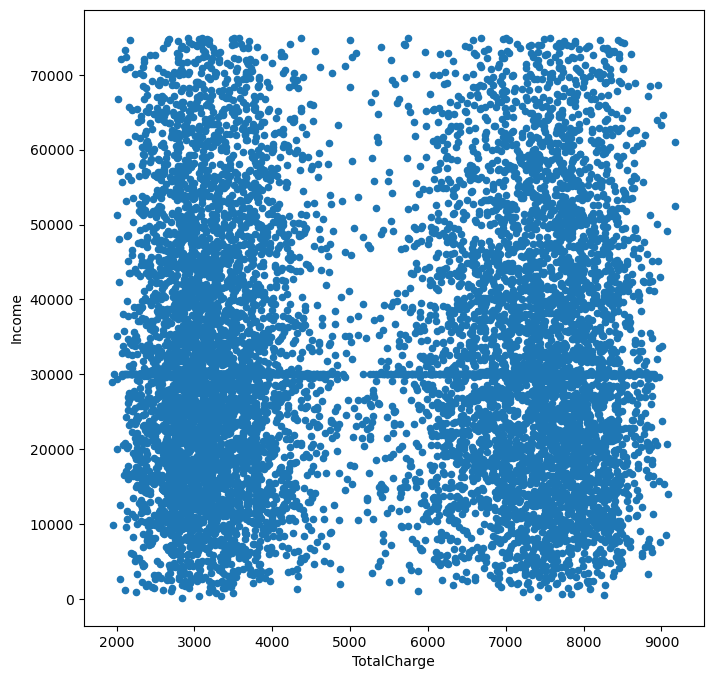

In [34]:
# TotalCharge vs. Income

medical_df.plot.scatter(x='TotalCharge', y='Income', marker = "o", figsize=(8,8))

<Axes: xlabel='TotalCharge', ylabel='Diabetes'>

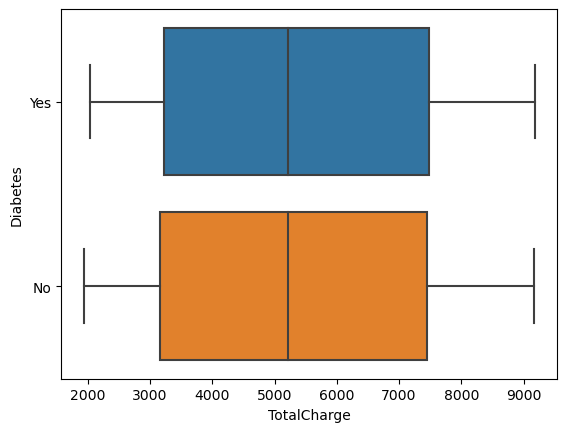

In [35]:
# TotalCharge vs. Diabetes

sns.boxplot(x='TotalCharge', y='Diabetes', data=medical_df)

<Axes: xlabel='TotalCharge', ylabel='Services'>

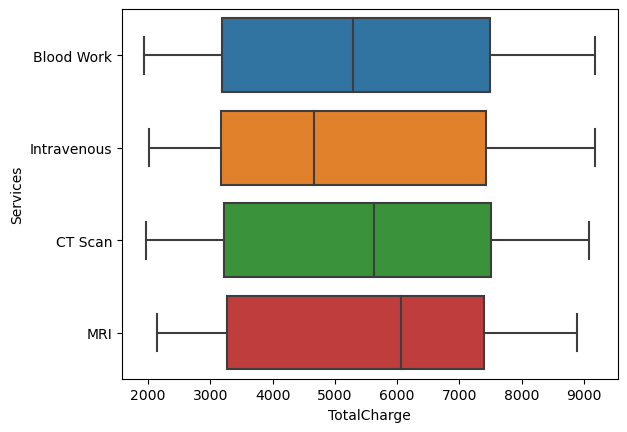

In [36]:
# TotalCharge vs. Services

sns.boxplot(x='TotalCharge', y='Services', data=medical_df)

<Axes: xlabel='TotalCharge', ylabel='Initial_admin'>

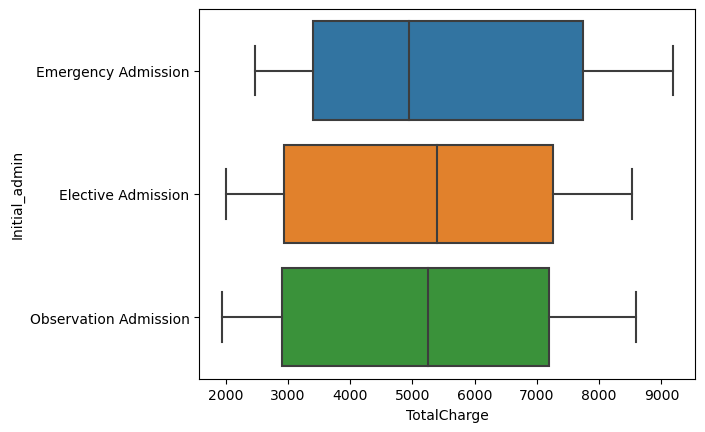

In [37]:
# TotalCharge vs. Initial_admin

sns.boxplot(x='TotalCharge', y='Initial_admin', data=medical_data)

In [38]:
# Get dummies for categorical variables

In [39]:
# Services Dummies

services_dummies = pd.get_dummies(medical_df['Services'], drop_first=True, dtype=int)
services_dummies

,CT Scan,Intravenous,MRI
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
9995,0,1,0
9996,1,0,0
9997,0,1,0
9998,0,0,0


In [40]:
# Initial_admin Dummies

initial_admin_dummies = pd.get_dummies(medical_df['Initial_admin'], drop_first=True, dtype=int)
initial_admin_dummies

,Emergency Admission,Observation Admission
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
9995,1,0
9996,0,0
9997,0,0
9998,1,0


In [41]:
# Diabetes

diabetes_dummies = pd.get_dummies(medical_df['Diabetes'], drop_first=True, dtype=int)
diabetes_dummies

,Yes
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,1
9997,0
9998,0


In [42]:
# Add Services dummies to df

medical_df = pd.concat([medical_df, services_dummies], axis=1)

In [43]:
# Add Diabetes dummies to df

medical_df = pd.concat([medical_df, diabetes_dummies], axis=1)

In [44]:
# Add initial admin dummies to df

medical_df = pd.concat([medical_df, initial_admin_dummies], axis=1)

In [45]:
medical_df.head()

,Diabetes,TotalCharge,Initial_days,Services,Initial_admin,Income,CT Scan,Intravenous,MRI,Yes,Emergency Admission,Observation Admission
0,Yes,3726.702860,10.585770,Blood Work,Emergency Admission,30043.98,0,0,0,1,1,0
1,No,4193.190458,15.129562,Intravenous,Emergency Admission,46805.99,0,1,0,0,1,0
2,Yes,2434.234222,4.772177,Blood Work,Elective Admission,14370.14,0,0,0,1,0,0
3,No,2127.830423,1.714879,Blood Work,Elective Admission,39741.49,0,0,0,0,0,0
4,No,2113.073274,1.254807,CT Scan,Elective Admission,1209.56,1,0,0,0,0,0


In [46]:
medical_df.rename(columns={"Yes": "Diabetes_Y_N"}, inplace=True)

In [47]:
medical_df.drop(['Diabetes','Services','Initial_admin'], axis=1)

,TotalCharge,Initial_days,Income,CT Scan,Intravenous,MRI,Diabetes_Y_N,Emergency Admission,Observation Admission
0,3726.702860,10.585770,30043.98,0,0,0,1,1,0
1,4193.190458,15.129562,46805.99,0,1,0,0,1,0
2,2434.234222,4.772177,14370.14,0,0,0,1,0,0
3,2127.830423,1.714879,39741.49,0,0,0,0,0,0
4,2113.073274,1.254807,1209.56,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,6850.942000,51.561220,45967.61,0,1,0,0,1,0
9996,7741.690000,68.668240,14983.02,1,0,0,1,0,0
9997,8276.481000,70.154180,65917.81,0,1,0,0,0,0
9998,7644.483000,63.356900,29702.32,0,0,0,0,1,0


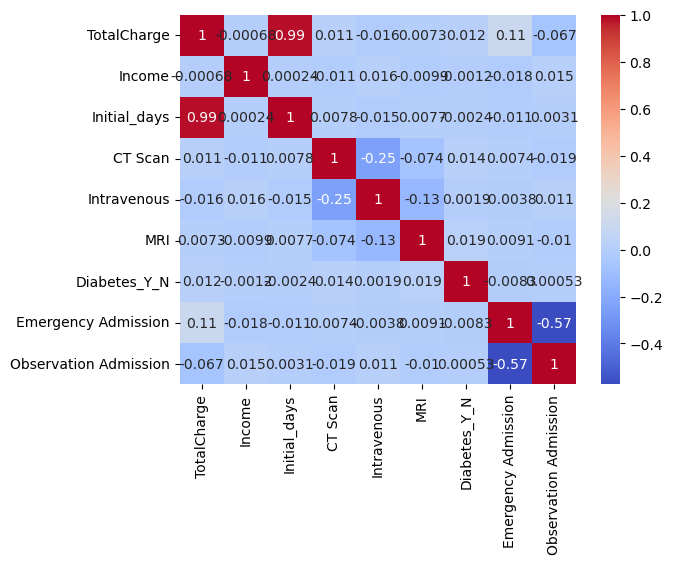

In [48]:
sns.heatmap(data=medical_df[['TotalCharge','Income','Initial_days','CT Scan','Intravenous','MRI','Diabetes_Y_N','Emergency Admission','Observation Admission']].corr(),annot=True, cmap='coolwarm');

In [49]:
# Split the data into training and test sets

X = medical_df[['Income','Initial_days','CT Scan','Intravenous','MRI','Diabetes_Y_N','Emergency Admission','Observation Admission']]
y = medical_df['TotalCharge']

print(X.shape)
print(y.shape)


(10000, 8)
(10000,)


In [50]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2,
                                                     random_state = 42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

X_train.to_csv("X_train_D209_Two.csv")
X_test.to_csv("X_test_D209_Two.csv")
y_train.to_csv("y_train_D209_Two.csv")
y_test.to_csv("y_test_D209_Two.csv")

(8000, 8)
(2000, 8)
(8000,)
(2000,)


In [51]:
parameters = {"n_estimators": [10,50,100],
             "max_features": [2, 3, 4],
             "max_depth": [8, None]
             }

In [52]:
rfr = RandomForestRegressor(random_state = 42)

In [53]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
rf_cv = GridSearchCV(rfr, cv = 10,
                    param_grid=parameters,
                    n_jobs=3)

In [55]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=3,
             param_grid={'max_depth': [8, None], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 50, 100]})

In [56]:
print("Best parameters: ", rf_cv.best_params_)

Best parameters:  {'max_depth': 8, 'max_features': 4, 'n_estimators': 100}


In [57]:
print("Training score: MSE ", rf_cv.best_score_)

Training score: MSE  0.9880946456089503


In [58]:
print("Training score: RMSE ", (rf_cv.best_score_)**(1/2))

Training score: RMSE  0.9940294993655623


In [59]:
y_train_pred = rf_cv.predict(X_train)
print("Training score: R-Squared ",r2_score(y_train, y_train_pred))

Training score: R-Squared  0.9902945872592709


In [60]:
y_pred = rf_cv.predict(X_test)

print("Testing score: MSE ", MSE(y_test, y_pred))
print("Testing score: RMSE ", MSE(y_test, y_pred)**(1/2))
print("Testing score: R-Squared ", r2_score(y_test, y_pred))

Testing score: MSE  56640.05640559824
Testing score: RMSE  237.99171499360696
Testing score: R-Squared  0.9879674470731129


In [61]:
importances = pd.Series(data=rf_cv.best_estimator_.feature_importances_,index= X_train.columns)

In [62]:
importances_sort = importances.sort_values()

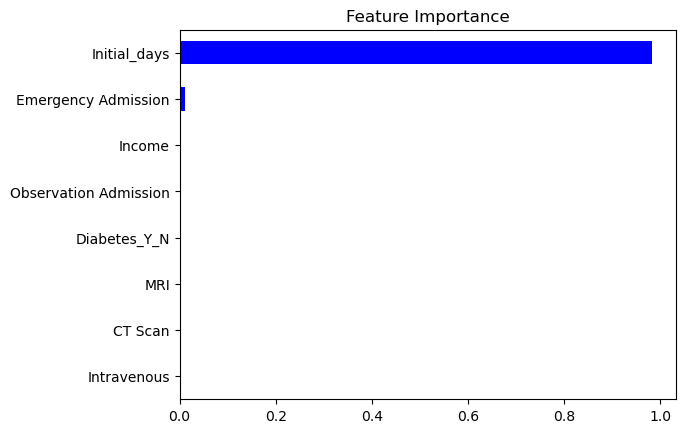

In [63]:
importances_sort.plot(kind='barh', color='blue')
plt.title('Feature Importance')
plt.show()

In [64]:
print("MSE on train data: ",round(rf_cv.best_score_,3))

MSE on train data:  0.988


In [65]:
print("MSE on test data: ",round(MSE(y_test, y_pred),3))

MSE on test data:  56640.056


In [66]:
rf_new = RandomForestRegressor(n_estimators=100, max_depth=8, max_features=4)

In [67]:
rf_new.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=4)

In [68]:
y_pred = rf_new.predict(X_test)

In [69]:
import sys

In [70]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
